In [17]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [18]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        
    def fit(self, X, y):
        # Get X, y and count weights
        
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
        return self
    
    def predict(self, X):
        # Get X and return model responses
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
            
        y_pred = X_train @ self.w
        
        return y_pred
        
    def get_weights(self):
        return self.w

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
# besed on features, generate target values with some noise
def linear_expression(X):
    return 5 * X + 6

objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

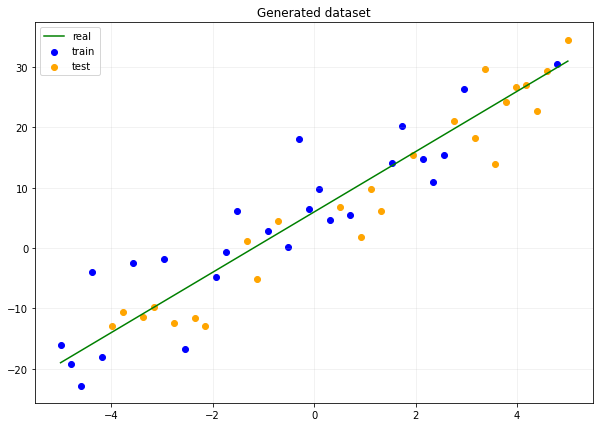

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', color='g')
plt.scatter(X_train, y_train, label='train', color='b')
plt.scatter(X_test, y_test, label='test', color='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [22]:
regressor = MyLinearRegression().fit(X_train[:, np.newaxis], y_train).predict(X_test[:, np.newaxis])

#regressor.fit(X_train[:, np.newaxis], y_train)

#predictions = regressor.predict(X_test[:, np.newaxis])
#w = regressor.get_weights()
#w

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

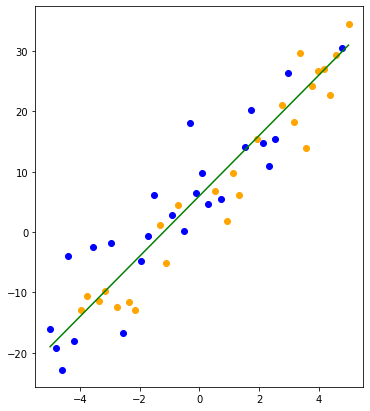

In [23]:
plt.figure(figsize=(20, 7))
ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', color='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', color='orange')
        
    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')
    
    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(' '.join(types))
    plt.grid(alpha=0.2)
    plt.legend()
plt.show()

In [ ]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 7))
#plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]),
         label='ours', c='r', linestyle='-')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), 
         label='sklearn', c='cyan', linestyle=':')

plt.title('Different Prediction')
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Test MSE: ', mean_squared_error(y_test, test_predictions))
print("MAE:", mean_absolute_error(regressor.predict(X_test[:, np.newaxis]), y_test))

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

# Градиентная оптимизация

In [25]:
regressor = MyGradientLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

NameError: name 'MyGradientLinearRegression' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

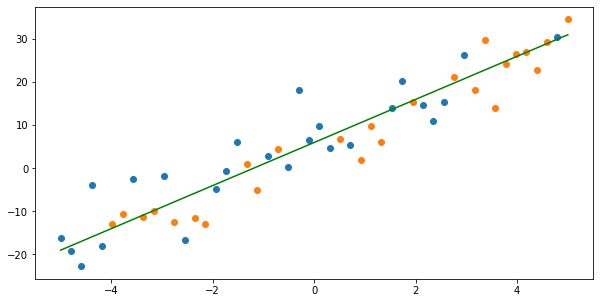

In [26]:
from sklearn.metrics import mean_absolute_error

plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(mean_absolute_error(regressor.predict(X_test[:, np.newaxis]), y_test))

### график лосса во время обучени

In [27]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)
plt.show()

NameError: name 'l' is not defined

<Figure size 720x504 with 0 Axes>

### SGD

In [28]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные парамертры род классу
        self.w = None
        self.n_sample = n_sample
        
    def _calc_gradient(self, X, y, y_pred):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)
        
        return grad
            

NameError: name 'MyGradientLinearRegression' is not defined

In [29]:
regressor = MySGDLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

NameError: name 'MySGDLinearRegression' is not defined

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

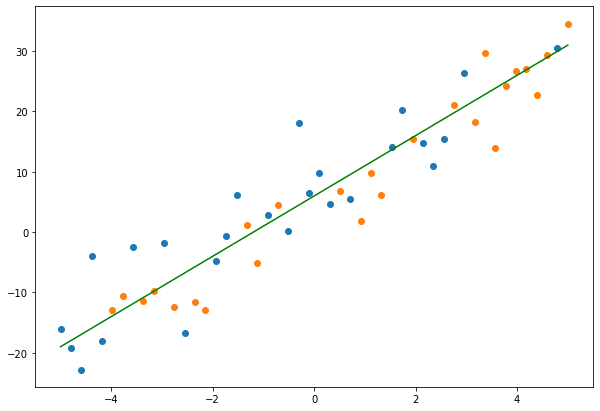

In [30]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [31]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

NameError: name 'l' is not defined

<Figure size 720x504 with 0 Axes>

In [32]:
n_samples = [1, 2, 4]

In [33]:
plt.figure(figsize=(10, 7))

for ns in n_samples:
    l = MySGDLinearRegression(fit_intercept=True, n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')
    
plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()


NameError: name 'MySGDLinearRegression' is not defined

<Figure size 720x504 with 0 Axes>

# Логистическая регрессия

In [34]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyLogisticRegression(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, max_iter=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}
        # Не забудьте про фиктивный признак равный 1!
        
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []
        
        for iter_num in range(max_iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))
        
        return losses
        
    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

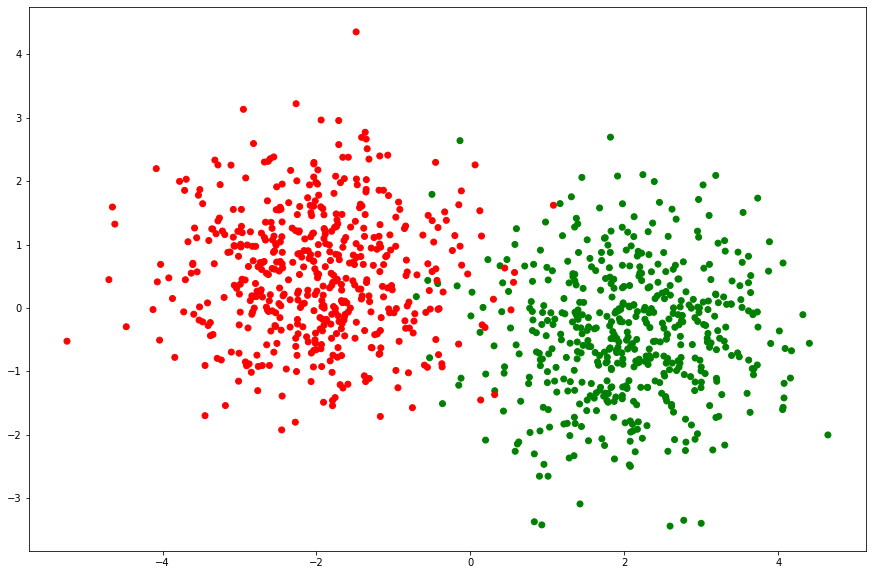

In [53]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[2, -0.5]],
                  cluster_std=1, random_state=42)

colors = ('red', 'green')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()


In [36]:
x = np.array([[5.1, 3.5, 1.4, 0.2],
          [4.9, 3. , 1.4, 0.2],
          [4.7, 3.2, 1.3, 0.2],
          [4.6, 3.1, 1.5, 0.2],
          [5. , 3.6, 1.4, 0.2],
          [5.4, 3.9, 1.7, 0.4],
          [4.6, 3.4, 1.4, 0.3],
          [5. , 3.4, 1.5, 0.2],
          [4.4, 2.9, 1.4, 0.2]])

x[:,:] #would mean u want every row and every column.

x[3,3] #would mean u want the 3 row and the 3 column value

x[:3,:3] #would mean u want the rows and columns until 3

x[:, 3] #would mean u want the 3 column and every row

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2])

In [37]:
clf = MyLogisticRegression()

clf.fit(X, y, max_iter=1000)

w = clf.get_weights()

[-5.34126734 -5.3210557  -5.30084405 ...  4.70392006  4.7241317
  4.74434335]


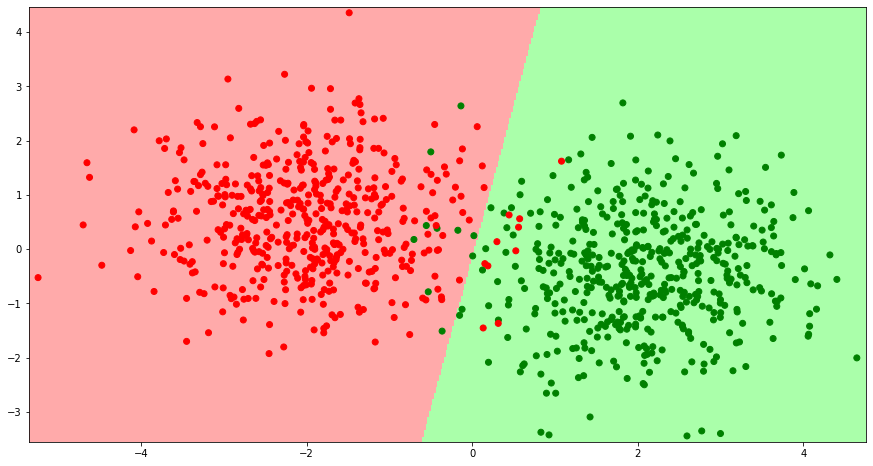

In [55]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.figure(figsize=(15, 8))

eps = 0.1

xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:, 0]) + eps, 500),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:, 1]) + eps, 500))

print(xx.ravel())
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

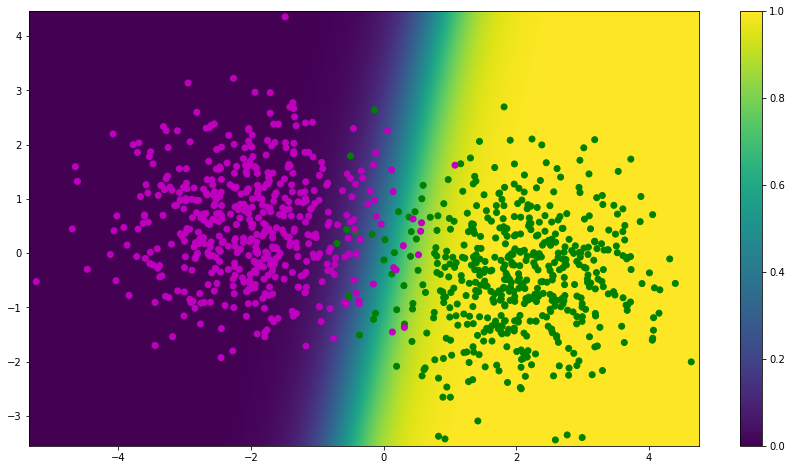

In [50]:
colors = ('magenta', 'green')
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0, 1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15, 8))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('viridis'))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.colorbar()
plt.show()


# Регуляризация

In [70]:
from sklearn.linear_models import Lasso, Ridge


object_num = 50
X = np.linspace(-5, 5, object_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)


### Ridge регрессия (l2 регуляризация)


In [73]:
reg = Ridge(alpha=1).fit(np.hstack((X, X, X))[:, np.newaxis], np.hstack((y, y, y)))
np.append(reg.coef_, reg.intercept_)

array([5.15655062, 5.71247568])

In [74]:
reg = Ridge(alpha=1/3).fit(X[:, np.newaxis], y)
np.append(reg.coef_, reg.intercept_)

array([5.15655062, 5.71247568])

In [75]:
class MyRidgeRegression(MyLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
    
    def fit(self, X, y):
        n, m = X.shape
        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))
        
        lambdaI = self.alpha * np.eye(X_train.shape[1])
        if self.fit_intercept:
            lambdaI[-1, -1] = 0

        self.w = np.linalg.inv(X_train.T @ X_train + lambdaI) @ X_train.T @ y

        return self

    def get_weights(self):
        return self.w

In [76]:
alpha = 1.0
regressor = MyRidgeRegression(alpha=alpha).fit(X_train[:, np.newaxis], y_train)

In [80]:
sklearn_reg = Ridge(alpha).fit(X_train[:, np.newaxis], y_train)
assert np.allclose(regressor.get_weights(), 
                   np.append(sklearn_reg.coef_, sklearn_reg.intercept_))
regressor.get_weights()

array([4.79657667])

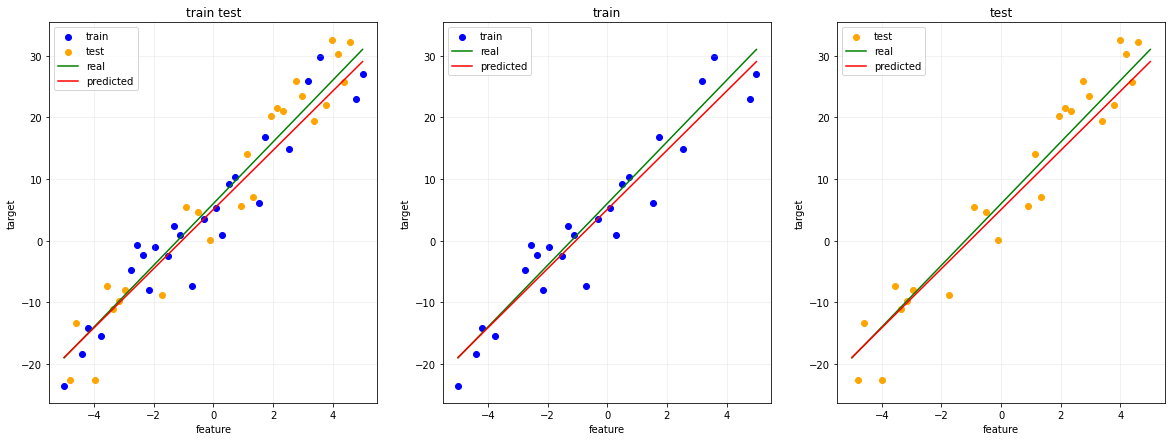

In [89]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

### LASSO регрессия (l1 регуляризация)

In [119]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

iris = load_iris()

In [120]:
data = pd.DataFrame(data=np.hstack([iris.data, iris.target[:, np.newaxis]]),
                    columns=iris.feature_names + ['target'])
names = data.columns
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


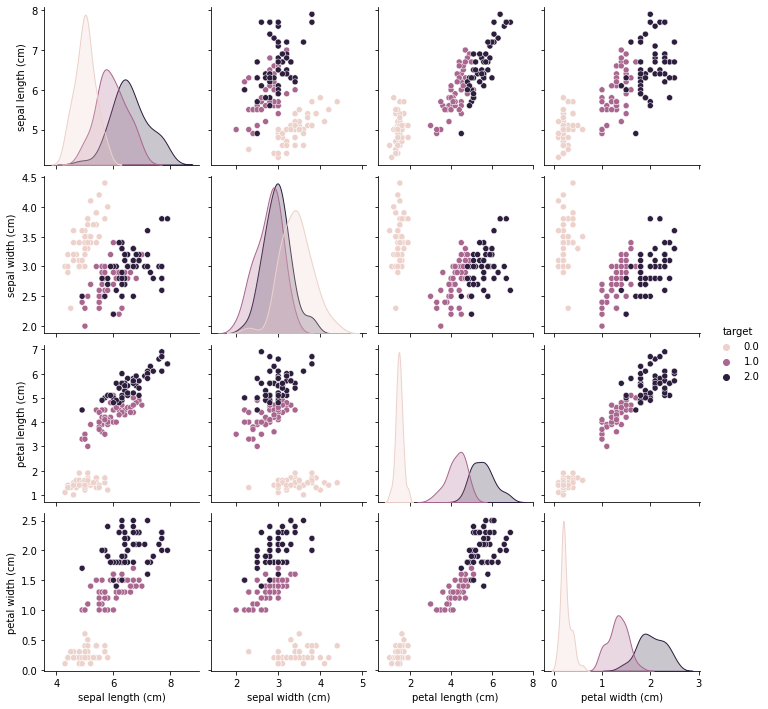

In [122]:
sns.pairplot(data, hue='target')

plt.show()

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data[names[:-1]], data[names[-1]])

In [134]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

In [138]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=2)
)

cls = cls.fit(X_train.to_numpy(), y_train)
preds_train = cls.predict(X_train)

accuracy_score(preds_train, y_train), f1_score(preds_train, y_train, average='macro')

/home/yunost/Desktop/github/linear-models/jupyterenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(0.9642857142857143, 0.9618279569892474)

In [139]:
preds_test = cls.predict(X_test)

accuracy_score(preds_test, y_test), f1_score(preds_test, y_test, average='macro')

/home/yunost/Desktop/github/linear-models/jupyterenv/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(1.0, 1.0)

In [142]:
cls[1].coef_, cls[1].intercept_

(array([[-1.25488087,  1.3441495 , -2.09129376, -2.00588007],
        [ 0.7719834 , -0.36261993, -0.67559582, -0.78599978],
        [ 0.48289746, -0.98152957,  2.76688958,  2.79187985]]),
 array([ 0.17082518,  2.19407402, -2.36489919]))

/home/yunost/Desktop/github/linear-models/jupyterenv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


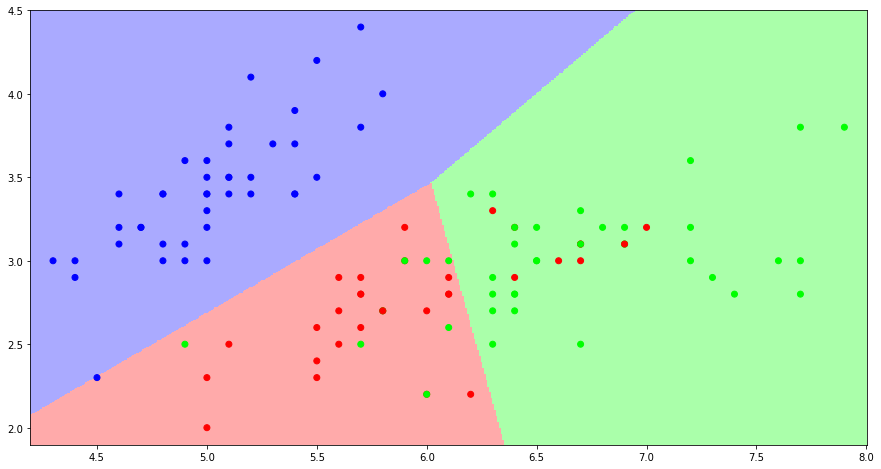

In [144]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_train[names[0]]) - eps, np.max(X_train[names[0]]) + eps, 500),
                     np.linspace(np.min(X_train[names[1]]) - eps, np.max(X_train[names[1]]) + eps, 500))



cls.fit(X_train[names[:2]], y_train)
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train[names[0]], X_train[names[1]], c=y_train, cmap='brg')